In [ ]:
import pandas as pd

# Load the uploaded files to inspect their contents
dim_date_path = ('dim_date.csv')
ev_sales_makers_path = ('electric_vehicle_sales_by_makers.csv')
ev_sales_state_path = ('electric_vehicle_sales_by_state.csv')

dim_date = pd.read_csv(dim_date_path)
ev_sales_makers = pd.read_csv(ev_sales_makers_path)
ev_sales_state = pd.read_csv(ev_sales_state_path)

# Display the first few rows of each dataset to understand their structure
(dim_date.head(), ev_sales_makers.head(), ev_sales_state.head())

(       date   state vehicle_category  electric_vehicles_sold  \
 0  1-Apr-21  Sikkim       2-Wheelers                       0   
 1  1-Apr-21  Sikkim       4-Wheelers                       0   
 2  1-May-21  Sikkim       2-Wheelers                       0   
 3  1-May-21  Sikkim       4-Wheelers                       0   
 4  1-Jun-21  Sikkim       2-Wheelers                       0   
 
    total_vehicles_sold  
 0                  398  
 1                  361  
 2                  113  
 3                   98  
 4                  229  ,
        date vehicle_category         maker  electric_vehicles_sold
 0  1-Apr-21       2-Wheelers  OLA ELECTRIC                       0
 1  1-Apr-22       2-Wheelers      OKAYA EV                       0
 2  1-May-21       2-Wheelers  OLA ELECTRIC                       0
 3  1-Jun-21       2-Wheelers  OLA ELECTRIC                       0
 4  1-Jul-21       2-Wheelers  OLA ELECTRIC                       0,
        date   state vehicle_category  ele

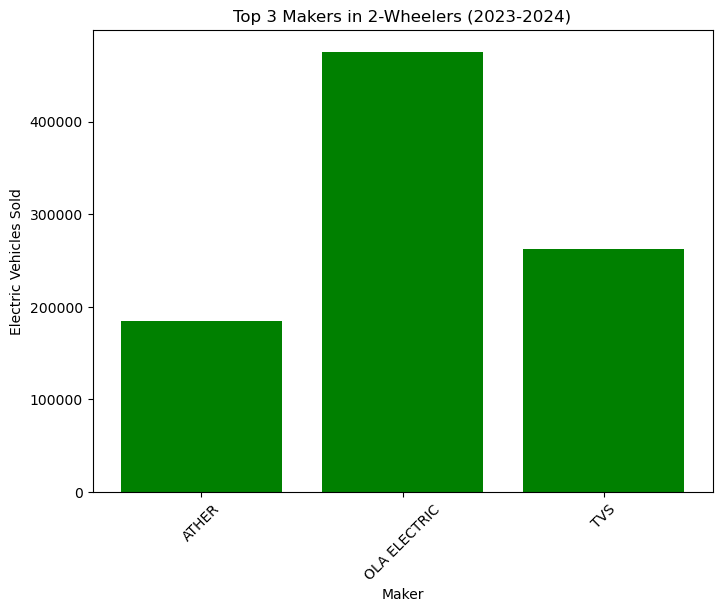

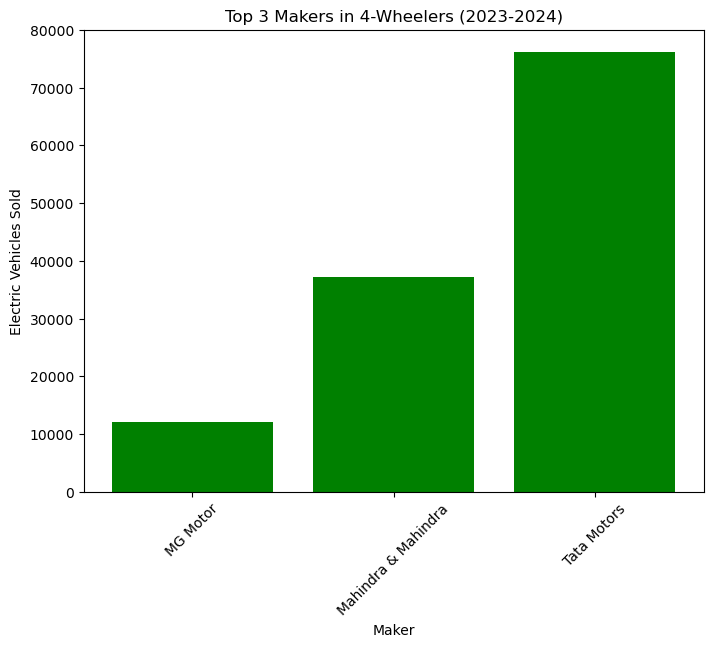

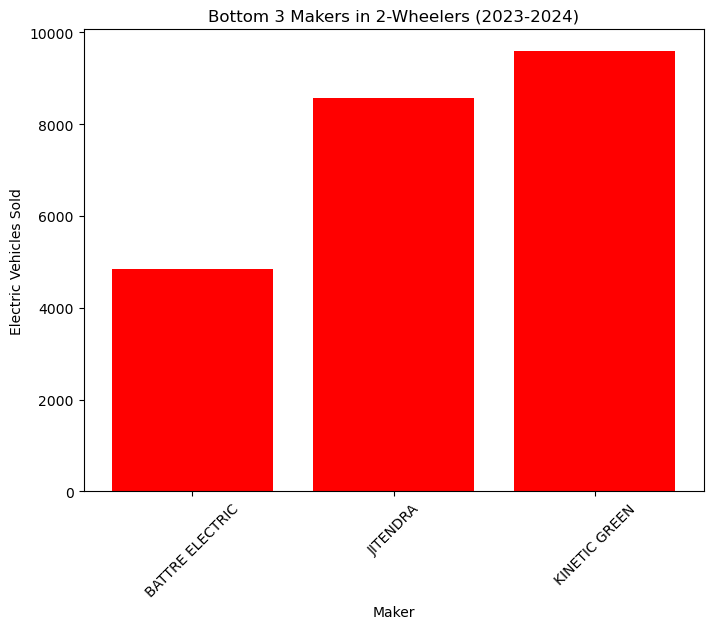

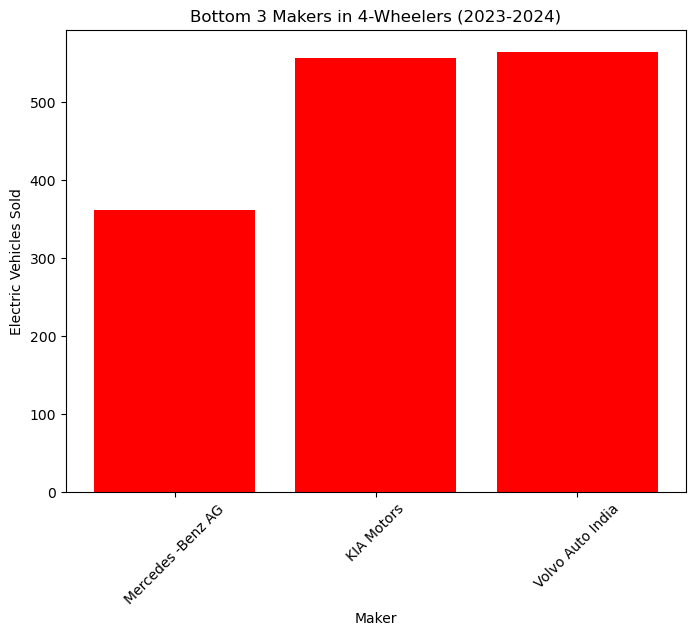

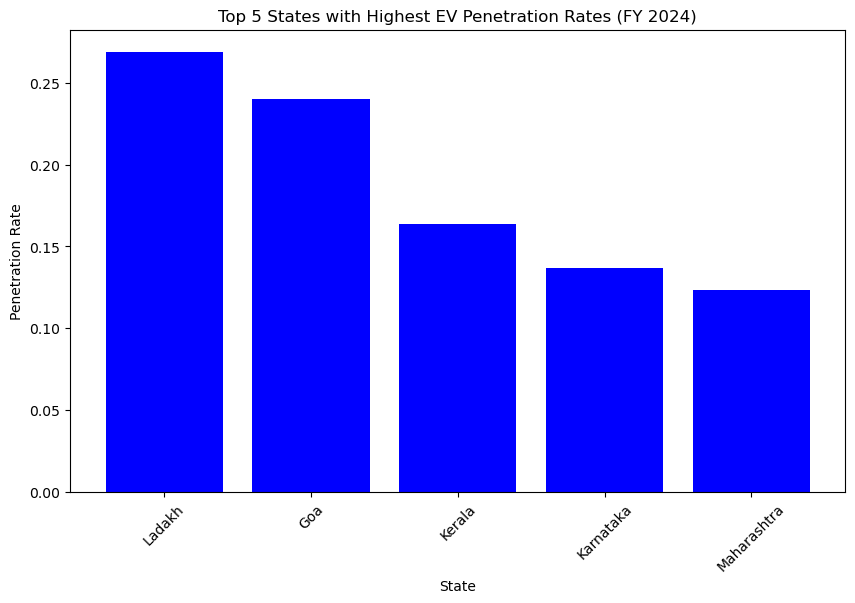

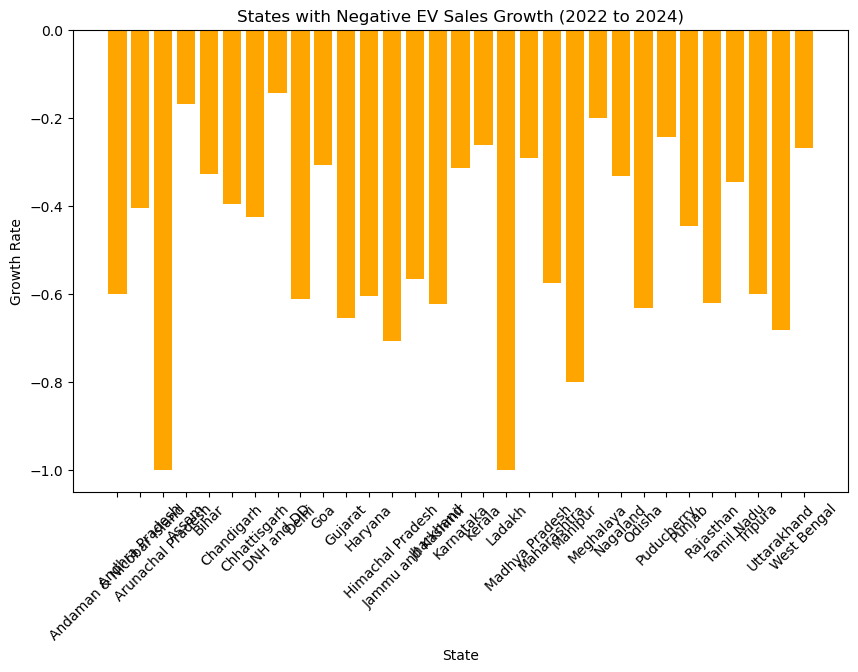

(                  maker vehicle_category  electric_vehicles_sold  rank
 1                 ATHER       2-Wheelers                  184473   3.0
 13             MG Motor       4-Wheelers                   12106   3.0
 14  Mahindra & Mahindra       4-Wheelers                   37151   2.0
 18         OLA ELECTRIC       2-Wheelers                  475072   1.0
 23                  TVS       2-Wheelers                  262836   2.0
 24          Tata Motors       4-Wheelers                   76227   1.0,
                                  maker vehicle_category  \
 vehicle_category                                          
 2-Wheelers       3     BATTRE ELECTRIC       2-Wheelers   
                  10           JITENDRA       2-Wheelers   
                  12      KINETIC GREEN       2-Wheelers   
 4-Wheelers       15  Mercedes -Benz AG       4-Wheelers   
                  11         KIA Motors       4-Wheelers   
                  25   Volvo Auto India       4-Wheelers   
 
             

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Load datasets
dim_date = pd.read_csv('dim_date.csv')
ev_sales_makers = pd.read_csv('electric_vehicle_sales_by_makers.csv')
ev_sales_state = pd.read_csv('electric_vehicle_sales_by_state.csv')

# Ensure proper datetime formatting
dim_date['date'] = pd.to_datetime(dim_date['date'], format='%d-%b-%y', errors='coerce')
ev_sales_makers['date'] = pd.to_datetime(ev_sales_makers['date'], format='%d-%b-%y', errors='coerce')
ev_sales_state['date'] = pd.to_datetime(ev_sales_state['date'], format='%d-%b-%y', errors='coerce')

# Filter data for relevant fiscal years
start_date = '2022-04-01'
end_date = '2024-03-31'
filtered_makers = ev_sales_makers[(ev_sales_makers['date'] >= start_date) & (ev_sales_makers['date'] <= end_date)]
filtered_states = ev_sales_state[(ev_sales_state['date'] >= start_date) & (ev_sales_state['date'] <= end_date)]

# 1. Top 3 and bottom 3 makers for fiscal years 2023 and 2024
makers_summary = (
    filtered_makers.groupby(['maker', 'vehicle_category'])
    .agg({'electric_vehicles_sold': 'sum'})
    .reset_index()
)
makers_summary['rank'] = makers_summary.groupby('vehicle_category')['electric_vehicles_sold'].rank(method='first', ascending=False)
top_3_makers = makers_summary[makers_summary['rank'] <= 3]
bottom_3_makers = makers_summary.groupby('vehicle_category').apply(lambda x: x.nsmallest(3, 'electric_vehicles_sold'))

# Plot for top 3 makers
for category in top_3_makers['vehicle_category'].unique():
    data = top_3_makers[top_3_makers['vehicle_category'] == category]
    plt.figure(figsize=(8, 6))
    plt.bar(data['maker'], data['electric_vehicles_sold'], color='green')
    plt.title(f'Top 3 Makers in {category} (2023-2024)')
    plt.xlabel('Maker')
    plt.ylabel('Electric Vehicles Sold')
    plt.xticks(rotation=45)
    plt.show()

# Plot for bottom 3 makers
for category in bottom_3_makers['vehicle_category'].unique():
    data = bottom_3_makers[bottom_3_makers['vehicle_category'] == category]
    plt.figure(figsize=(8, 6))
    plt.bar(data['maker'], data['electric_vehicles_sold'], color='red')
    plt.title(f'Bottom 3 Makers in {category} (2023-2024)')
    plt.xlabel('Maker')
    plt.ylabel('Electric Vehicles Sold')
    plt.xticks(rotation=45)
    plt.show()

# 2. Top 5 states with highest penetration rate in EV sales (FY 2024)
states_summary_2024 = (
    filtered_states[filtered_states['date'].dt.year == 2024]
    .groupby(['state', 'vehicle_category'])
    .agg({
        'electric_vehicles_sold': 'sum',
        'total_vehicles_sold': 'sum'
    })
    .reset_index()
)
states_summary_2024['penetration_rate'] = states_summary_2024['electric_vehicles_sold'] / states_summary_2024['total_vehicles_sold']
top_5_states_2024 = states_summary_2024.nlargest(5, 'penetration_rate')

# Plot for top 5 states with highest penetration rates
plt.figure(figsize=(10, 6))
plt.bar(top_5_states_2024['state'], top_5_states_2024['penetration_rate'], color='blue')
plt.title('Top 5 States with Highest EV Penetration Rates (FY 2024)')
plt.xlabel('State')
plt.ylabel('Penetration Rate')
plt.xticks(rotation=45)
plt.show()

# 3. States with negative EV sales growth (2022 to 2024)
states_growth = (
    filtered_states.groupby(['state', 'vehicle_category', filtered_states['date'].dt.year])
    .agg({'electric_vehicles_sold': 'sum'})
    .unstack()
    .reset_index()
)
states_growth.columns = ['state', 'vehicle_category', '2022', '2023', '2024']
states_growth['growth_2022_to_2024'] = (states_growth['2024'] - states_growth['2022']) / states_growth['2022']
negative_growth_states = states_growth[states_growth['growth_2022_to_2024'] < 0]

# Plot for states with negative growth
plt.figure(figsize=(10, 6))
plt.bar(negative_growth_states['state'], negative_growth_states['growth_2022_to_2024'], color='orange')
plt.title('States with Negative EV Sales Growth (2022 to 2024)')
plt.xlabel('State')
plt.ylabel('Growth Rate')
plt.xticks(rotation=45)
plt.show()

# Output results for inspection
top_3_makers, bottom_3_makers, top_5_states_2024, negative_growth_states